# 1.Imports & reading dataset <a name="1"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report, plot_roc_curve, plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.shape

(270, 14)

In [4]:
df.head()

,AGE,SEX,CHEST_PAIN,BLOOD_PRESSURE,CHOLESTORAL,BLOOD_SUGAR,EKG,MAX_HEART_RATE,ANGINA,OLDPEAK,PEAK_ST,FLOUROSOPY,THAL,TARGET
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [5]:
df.tail()

,AGE,SEX,CHEST_PAIN,BLOOD_PRESSURE,CHOLESTORAL,BLOOD_SUGAR,EKG,MAX_HEART_RATE,ANGINA,OLDPEAK,PEAK_ST,FLOUROSOPY,THAL,TARGET
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1
269,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2


# 2.Data Description & Preprocessing<a name="2"></a>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AGE             270 non-null    float64
 1   SEX             270 non-null    float64
 2   CHEST_PAIN      270 non-null    float64
 3   BLOOD_PRESSURE  270 non-null    float64
 4   CHOLESTORAL     270 non-null    float64
 5   BLOOD_SUGAR     270 non-null    float64
 6   EKG             270 non-null    float64
 7   MAX_HEART_RATE  270 non-null    float64
 8   ANGINA          270 non-null    float64
 9   OLDPEAK         270 non-null    float64
 10  PEAK_ST         270 non-null    float64
 11  FLOUROSOPY      270 non-null    float64
 12  THAL            270 non-null    float64
 13  TARGET          270 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 29.7 KB


In [7]:
df.describe()

,AGE,SEX,CHEST_PAIN,BLOOD_PRESSURE,CHOLESTORAL,BLOOD_SUGAR,EKG,MAX_HEART_RATE,ANGINA,OLDPEAK,PEAK_ST,FLOUROSOPY,THAL,TARGET
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [8]:
df.isnull().sum()

AGE               0
SEX               0
CHEST_PAIN        0
BLOOD_PRESSURE    0
CHOLESTORAL       0
BLOOD_SUGAR       0
EKG               0
MAX_HEART_RATE    0
ANGINA            0
OLDPEAK           0
PEAK_ST           0
FLOUROSOPY        0
THAL              0
TARGET            0
dtype: int64

<AxesSubplot:title={'center':'Finding Null Values Using Heatmap\n'}>

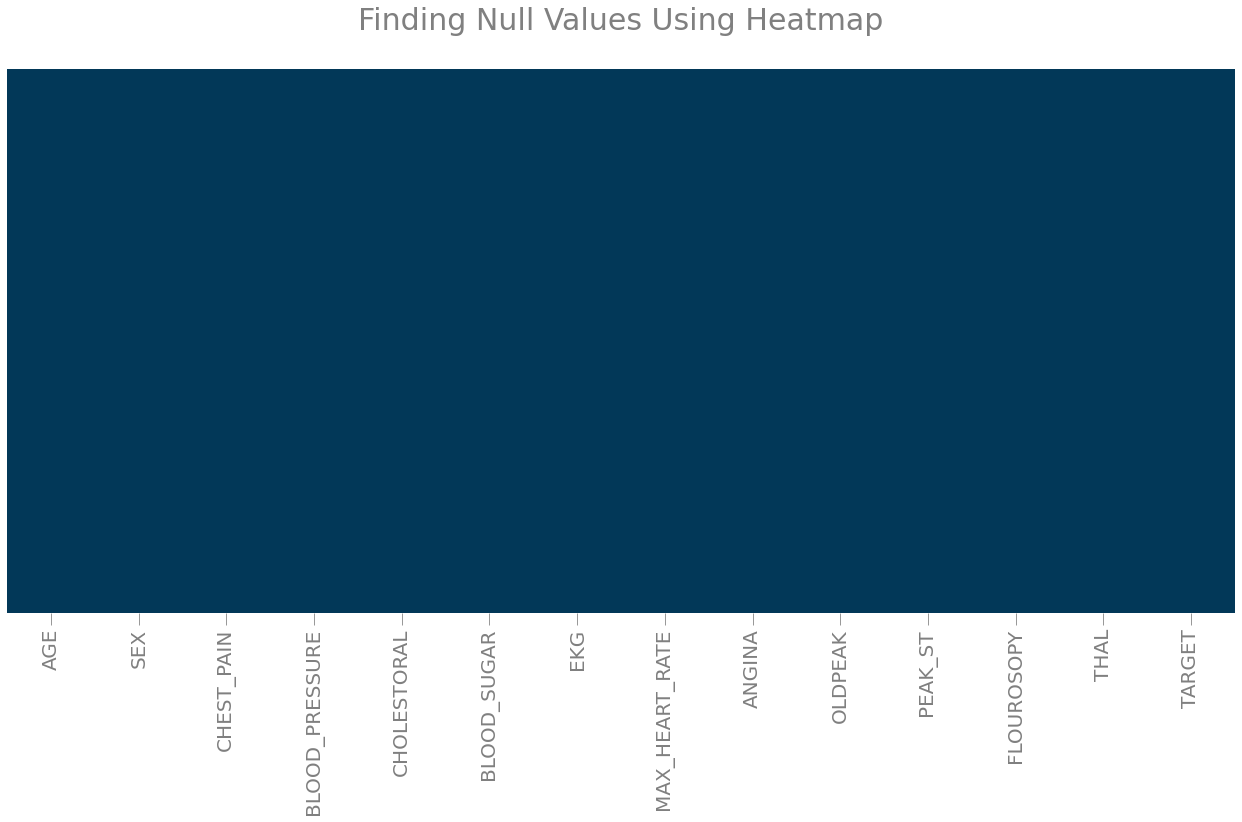

In [9]:
# visualizing null values if it exists
plt.figure(figsize=(22,10))

plt.xticks(size=20,color='grey')
plt.tick_params(size=12,color='grey')

plt.title('Finding Null Values Using Heatmap\n',color='grey',size=30)

sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='PuBu_r',
            )

In [10]:
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df = df.reset_index(drop=True)
df

,AGE,SEX,CHEST_PAIN,BLOOD_PRESSURE,CHOLESTORAL,BLOOD_SUGAR,EKG,MAX_HEART_RATE,ANGINA,OLDPEAK,PEAK_ST,FLOUROSOPY,THAL,TARGET
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
2,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
3,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
4,65.0,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
257,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
258,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
259,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


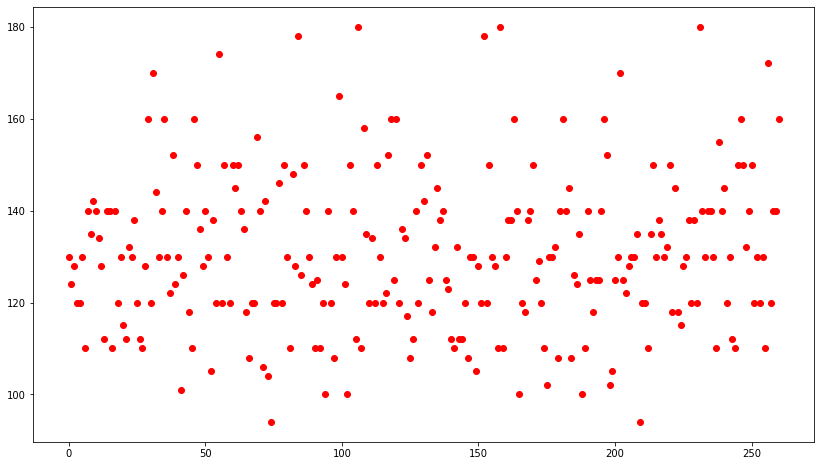

In [11]:
age_column = df['BLOOD_PRESSURE']
plt.figure(figsize=(14,8))
plt.plot(age_column, 'ro')
plt.show()

In [12]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

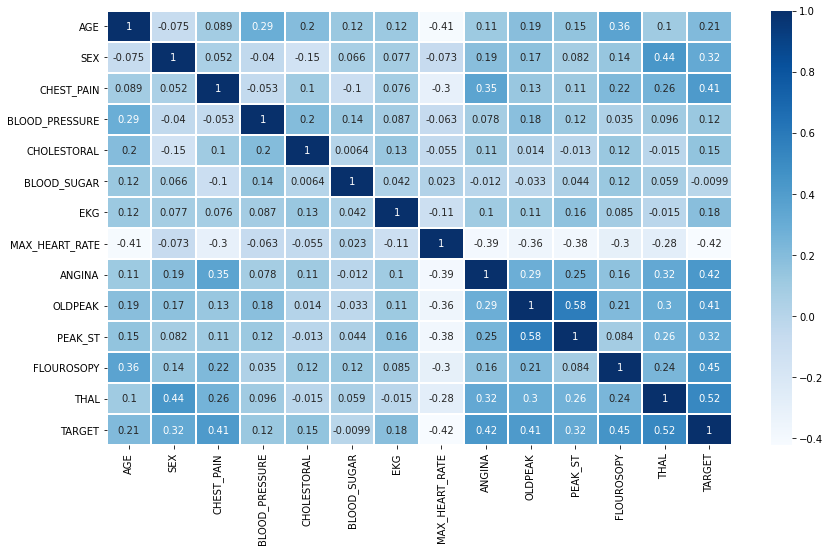

In [13]:
corr_matrix = df.corr()

plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix, linewidths=.01, annot = True, cmap='Blues')
plt.show()

In [14]:
corr_matrix['TARGET'].sort_values(ascending=False)

TARGET            1.000000
THAL              0.520883
FLOUROSOPY        0.449757
ANGINA            0.423891
CHEST_PAIN        0.412151
OLDPEAK           0.410862
PEAK_ST           0.321008
SEX               0.318727
AGE               0.212545
EKG               0.182940
CHOLESTORAL       0.151142
BLOOD_PRESSURE    0.121860
BLOOD_SUGAR      -0.009912
MAX_HEART_RATE   -0.423111
Name: TARGET, dtype: float64

# 3. Split data to train, test and validation dataset<a name="2"></a>

In [15]:
X = df.iloc[:, 0:13] # Features
y = df.iloc[:, 13] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

print('Training data shape:', X_train.shape)
print('Test data shape: ', X_test.shape)
print('Validation data shape: ', X_val.shape)

Training data shape: (156, 13)
Test data shape:  (53, 13)
Validation data shape:  (52, 13)


In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

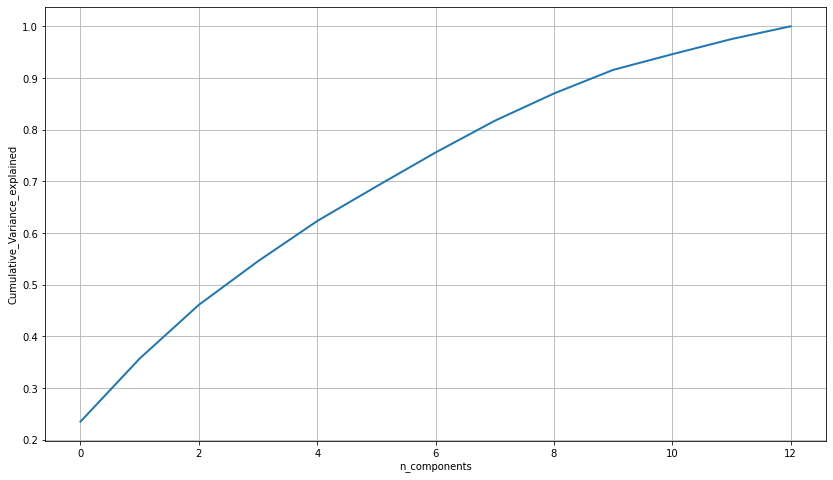

In [17]:
pca = PCA()  
pca_data=pca.fit_transform(X_train)
percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)
# plot PCA spectrum   
plt.figure(1,figsize=(14,8))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

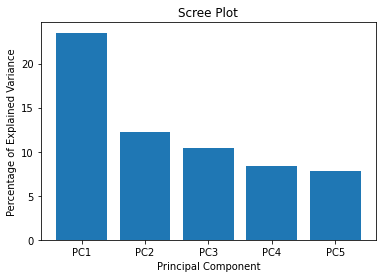

In [18]:
pca_5 =  PCA(n_components=5)
X_train_pca_5 = pca_5.fit_transform(X_train)
X_test_pca_5 = pca_5.transform(X_test)

per_var = np.round(pca_5.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [19]:
principalDf = pd.DataFrame(data=X_train_pca_5, columns=['PC1','PC2','PC3','PC4','PC5']) 
principalDf.head()
finalDf = pd.concat([principalDf,df[['TARGET']]], axis=1)
finalDf.head()

,PC1,PC2,PC3,PC4,PC5,TARGET
0,-0.956027,0.901479,0.104290,1.240878,0.467370,2
1,-1.335114,-0.439953,-1.210510,0.055278,1.465868,2
2,0.267655,-0.785250,-0.040999,0.427525,0.547430,1
3,-0.688971,0.825874,-0.891532,-0.234595,-1.771112,1
4,0.056176,-0.968245,-0.608163,0.140300,2.309554,1


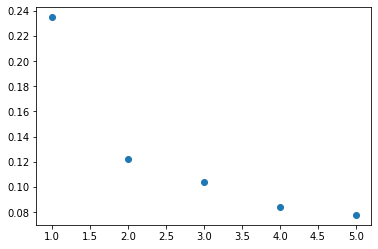

In [20]:
explained_variance = pca_5.explained_variance_ratio_
explained_variance
plt.scatter(x=range(1, len(per_var)+1), y=explained_variance)
plt.show()

# 3. KNN classification<a name="2"></a>

In [21]:
data = X_train
data_test = X_test
target = y_train
target_test = y_test

n_neighbors = 3
kNN_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
kNN_classifier.fit(data, target)

# KNN VISUALISATION doesn't work !

# plt.figure(figsize=(15,8))
# ax = plot_decision_regions(X_train_pca_5, y_train, clf=kNN_classifier)
# plt.xlabel('1. składowa PCA')
# plt.ylabel('2. składowa PCA')
# plt.title('Wizualizacja działania algorytmu kNN')
# plt.grid()
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, target_names, framealpha=0.3, scatterpoints=1)

KNeighborsClassifier(n_neighbors=3)

----- K-NEAREST NEIGHBORS PERFORMANCE ON TRAINING DATASET -----
Accuracy:  0.8397435897435898
Classification report:
              precision    recall  f1-score   support

     class 1       0.88      0.83      0.85        86
     class 2       0.80      0.86      0.83        70

    accuracy                           0.84       156
   macro avg       0.84      0.84      0.84       156
weighted avg       0.84      0.84      0.84       156

Confusion matrix:
ROC curve


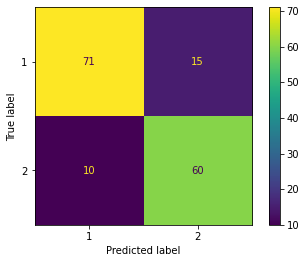

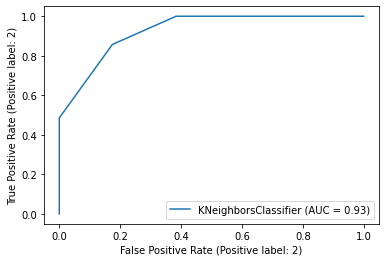

In [22]:
print('----- K-NEAREST NEIGHBORS PERFORMANCE ON TRAINING DATASET -----')
knn_predictions = kNN_classifier.predict(data)
knn_accuracy = accuracy_score(target, knn_predictions)
print('Accuracy: ', knn_accuracy)

print("Classification report:")
target_names = ['class 1', 'class 2']
print(classification_report(target, knn_predictions, target_names=target_names))

print("Confusion matrix:")
plot_confusion_matrix(kNN_classifier, data, target)  

print("ROC curve")
plot_roc_curve(kNN_classifier, data, target)  

----- K-NEAREST NEIGHBORS PERFORMANCE ON TEST DATASET -----
Accuracy:  0.8113207547169812
Classification report:
              precision    recall  f1-score   support

     class 1       0.91      0.72      0.81        29
     class 2       0.73      0.92      0.81        24

    accuracy                           0.81        53
   macro avg       0.82      0.82      0.81        53
weighted avg       0.83      0.81      0.81        53

Confusion matrix:
ROC curve


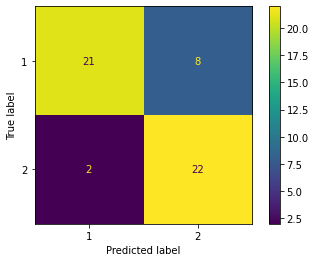

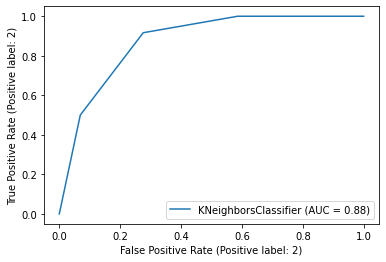

In [23]:
print('----- K-NEAREST NEIGHBORS PERFORMANCE ON TEST DATASET -----')
knn_predictions = kNN_classifier.predict(data_test)
knn_accuracy = accuracy_score(target_test, knn_predictions)
print('Accuracy: ', knn_accuracy)

print("Classification report:")
target_names = ['class 1', 'class 2']
print(classification_report(target_test, knn_predictions, target_names=target_names))

print("Confusion matrix:")
plot_confusion_matrix(kNN_classifier, data_test, target_test)  

print("ROC curve")
plot_roc_curve(kNN_classifier, data_test, target_test)  

In [24]:
scores = cross_val_score(kNN_classifier, data, target, cv=5)
print("Scores: ", sorted(scores))

print(f"{scores.mean()} accuracy with a standard deviation of {scores.std()}")

Scores:  [0.7096774193548387, 0.71875, 0.7741935483870968, 0.7741935483870968, 0.9032258064516129]
0.776008064516129 accuracy with a standard deviation of 0.06909295078425091


# 4. KNN classification with PCA<a name="2"></a>

In [25]:
data = X_train_pca_5
data_test = X_test_pca_5
target = y_train
target_test = y_test

n_neighbors = 3
kNN_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
kNN_classifier.fit(data, target)

KNeighborsClassifier(n_neighbors=3)

----- K-NEAREST NEIGHBORS PERFORMANCE WITH PCA ON TRAINING DATASET -----
Accuracy:  0.8717948717948718
Classification report:
              precision    recall  f1-score   support

     class 1       0.90      0.86      0.88        86
     class 2       0.84      0.89      0.86        70

    accuracy                           0.87       156
   macro avg       0.87      0.87      0.87       156
weighted avg       0.87      0.87      0.87       156

Confusion matrix:
ROC curve


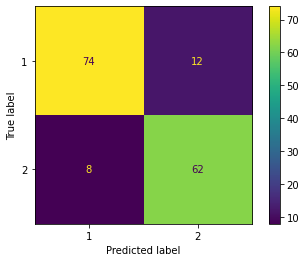

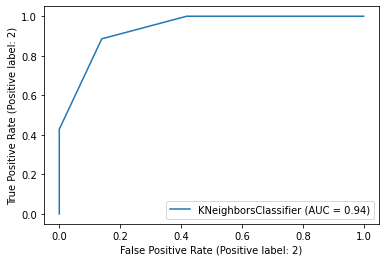

In [26]:
print('----- K-NEAREST NEIGHBORS PERFORMANCE WITH PCA ON TRAINING DATASET -----')
knn_predictions = kNN_classifier.predict(data)
knn_accuracy = accuracy_score(target, knn_predictions)
print('Accuracy: ', knn_accuracy)

print("Classification report:")
target_names = ['class 1', 'class 2']
print(classification_report(target, knn_predictions, target_names=target_names))

print("Confusion matrix:")
plot_confusion_matrix(kNN_classifier, data, target)  

print("ROC curve")
plot_roc_curve(kNN_classifier, data, target)  

----- K-NEAREST NEIGHBORS PERFORMANCE WITH PCA ON TEST DATASET -----
Accuracy:  0.8679245283018868
Classification report:
              precision    recall  f1-score   support

     class 1       0.92      0.83      0.87        29
     class 2       0.81      0.92      0.86        24

    accuracy                           0.87        53
   macro avg       0.87      0.87      0.87        53
weighted avg       0.87      0.87      0.87        53

Confusion matrix:
ROC curve


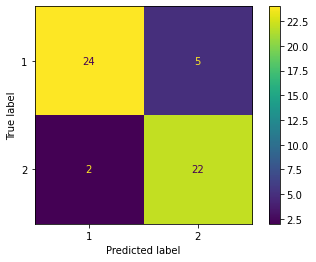

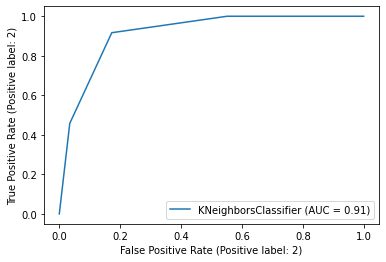

In [27]:
print('----- K-NEAREST NEIGHBORS PERFORMANCE WITH PCA ON TEST DATASET -----')
knn_predictions = kNN_classifier.predict(data_test)
knn_accuracy = accuracy_score(target_test, knn_predictions)
print('Accuracy: ', knn_accuracy)

print("Classification report:")
target_names = ['class 1', 'class 2']
print(classification_report(target_test, knn_predictions, target_names=target_names))

print("Confusion matrix:")
plot_confusion_matrix(kNN_classifier, data_test, target_test)  

print("ROC curve")
plot_roc_curve(kNN_classifier, data_test, target_test)  

In [30]:
scores = cross_val_score(kNN_classifier, data_test, target_test, cv=5)
print("Scores: ", sorted(scores))

print(f"{scores.mean()} accuracy with a standard deviation of {scores.std()}")

Scores:  [0.7, 0.7272727272727273, 0.8181818181818182, 0.8181818181818182, 0.9]
0.7927272727272727 accuracy with a standard deviation of 0.07167419397973465


# 5. Linear Regression classification<a name="2"></a>

# 6. Linear Regression classification with PCA<a name="2"></a>